In [1]:
from moduls.load_data import DataMenager
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Ładowanie danych

In [2]:
DOWNLOAD_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases'
DATA_LOCATION = '/heart-disease/processed.cleveland.data'
DATA_URL = DOWNLOAD_ROOT + DATA_LOCATION
DATA_PATH = 'data_set'

In [3]:
'''
Nadanie kolumną odpowiednich nazw 
względem podanych informacji na stronie w pliku heart-disease.names:
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names
'''

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
           'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
           'thal', 'target']
#Definicja kolumn z wartościmi dyskretnymi i ciągłymi 
cat_col = ['sex','cp','fbs','restecg','exang','slope','thal', 'target']
num_col = ['age', 'trestbps', 'chol',  'thalach',  'oldpeak','ca']

In [4]:
dm = DataMenager(DATA_PATH, DATA_URL)# Tworzenie istancji własnej klasy

In [5]:
#Pobranie danych ze strony UCI
dm.fetch_data_from_web('raw_HeartDisease.csv')
raw_df = dm.load_raw_data('raw_HeartDisease.csv', columns)

In [6]:
df = raw_df.copy()

# Sprawdzanie ogólnych informacj o danych

- 1. age: age in years
- 2. sex: sex 
        - Value 1 = male 
        - Value 0 = female     
- 3. cp: chest pain type
        - Value 1: typical angina
        - Value 2: atypical angina
        - Value 3: non-anginal pain
        - Value 4: asymptomatic      
- 4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- 5. chol: serum cholestoral in mg/dl      
- 6. fbs: fasting blood sugar > 120 mg/dl 
        - Value 1:true
        - Value 0: false     
- 7. restecg: resting electrocardiographic results
        - Value 0: normal
        - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
- 8. thalach: resting heart rate   
- 9. exang: exercise induced angina 
        - Value 1: yes
        - Value 0: no   
- 10. oldpeak:  ST depression induced by exercise relative to rest
- 11. slope: the slope of the peak exercise ST segment
        - Value 1: upsloping
        - Value 2: flat
        - Value 3: downsloping   
- 12. ca:  number of major vessels (0-3) colored by flourosopy     
- 13. thal:  
        - Value 3:  normal; 
        - Value 6: fixed defect; 
        - Value 7: reversable defect    
- 14. target: 
Displays whether the individual is suffering  from heart disease or not :
        - 0 = absence
        - 1, 2, 3, 4 = present.

In [7]:
#Rozmiar zestawu danych
df.shape

(303, 14)

In [8]:
#Przegląd zawartości zestawu danych 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
#Ogólne inforamcje o zestawie danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


# Usuwanie

In [10]:
#Sprawdzanie czy istnieją braki w danch
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
#Sprawdzenie szczegółowe zawartości kolumn typu object
for i in cat_col+['ca']:
    print(50*'-'+'\n' + str(df[f'{i}'].value_counts()));

--------------------------------------------------
1.0    206
0.0     97
Name: sex, dtype: int64
--------------------------------------------------
4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64
--------------------------------------------------
0.0    258
1.0     45
Name: fbs, dtype: int64
--------------------------------------------------
0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64
--------------------------------------------------
0.0    204
1.0     99
Name: exang, dtype: int64
--------------------------------------------------
1.0    142
2.0    140
3.0     21
Name: slope, dtype: int64
--------------------------------------------------
3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64
--------------------------------------------------
0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64
--------------------------------------------------
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: i

In [12]:
def decoding_data_hd(df):
    '''
    Metoda służąca do roszywrowanie
    wartosći znajdąjących się w danych
    hear disease na podstawie pliku
    hear-disease.name, oraz wartości nieznane
    zakodowanie jako NaN
    '''
    transformationSex = {0:'female',
                         1:'male'}
    df['sex'] = df['sex'].map(transformationSex)

    transformationCp = {1:'typical angina',
                        2:'atypical angina',
                        3:'non-anginal pain',
                        4:'asymptomatic'}
    df['cp'] = df['cp'].map(transformationCp)

    transformationFbs = {0:'lower than 120mg/ml',
                         1:'greater than 120mg/ml'}
    df['fbs'] = df['fbs'].map(transformationFbs)

    transformationRestecg = {0:'normal', 
                             1:'ST-T wave abnormality', 
                             2:'left ventricular hypertrophy'}
    df['restecg'] = df['restecg'].map(transformationRestecg)

    transformationExang = {0:'no', 
                           1:'yes'}
    df['exang'] = df['exang'].map(transformationExang)

    transformationSlope = {1:'upsloping', 
                           2:'flat', 
                           3:'downsloping'}
    df['slope'] = df['slope'].map(transformationSlope)

    transformationThal = {'3.0':'normal', 
                          '6.0':'fixed defect', 
                          '7.0':'reversable defect'}
    df['thal'] = df['thal'].map(transformationThal)

    transformationDict = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}
    df['target'] = df['target'].map(transformationDict)
    
    transformationCa = {'0.0': 0.0, '1.0': 1.0, '2.0': 2.0, '3.0': 3.0}
    df['ca'] = df['ca'].map(transformationCa)
    #df.loc[df['ca'].str.contains('\?'),'ca'] = np.nan

In [13]:
#Transformacja danych
decoding_data_hd(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,male,typical angina,145.0,233.0,greater than 120mg/ml,left ventricular hypertrophy,150.0,no,2.3,downsloping,0.0,fixed defect,0
1,67.0,male,asymptomatic,160.0,286.0,lower than 120mg/ml,left ventricular hypertrophy,108.0,yes,1.5,flat,3.0,normal,1
2,67.0,male,asymptomatic,120.0,229.0,lower than 120mg/ml,left ventricular hypertrophy,129.0,yes,2.6,flat,2.0,reversable defect,1
3,37.0,male,non-anginal pain,130.0,250.0,lower than 120mg/ml,normal,187.0,no,3.5,downsloping,0.0,normal,0
4,41.0,female,atypical angina,130.0,204.0,lower than 120mg/ml,left ventricular hypertrophy,172.0,no,1.4,upsloping,0.0,normal,0


In [14]:
#Sprawdzenie braków ponownie
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

<AxesSubplot:>

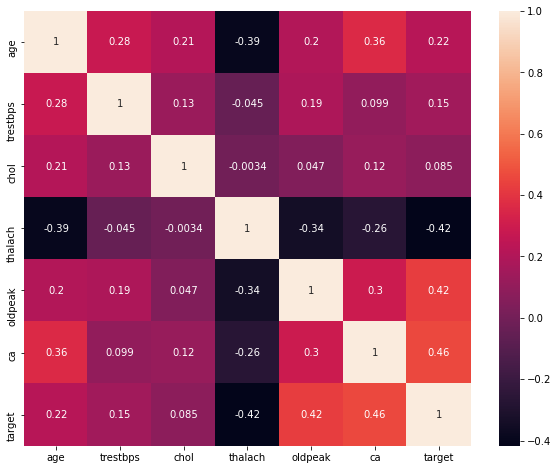

In [15]:
#Badanie korelacji między danymi
plt.figure(figsize=(10,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

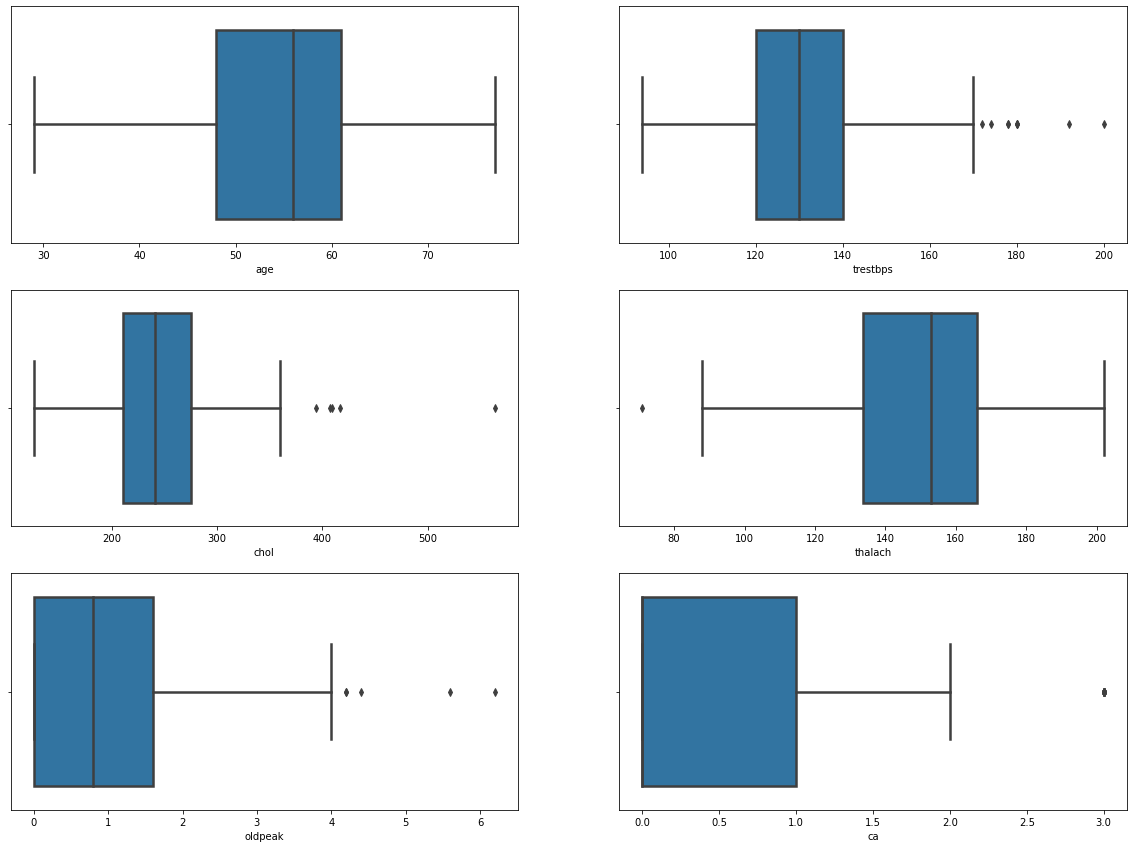

In [16]:
#Sprawdzanie rozrzutu danych
plt.figure(figsize=(20,20))
for i,feature in enumerate(num_col):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=feature, data=df, linewidth=2.5)

In [17]:
#Usunięcie rekordów z pustymi komórkami
df = df.dropna()

# Zmiana typów danych kolumn

In [18]:
for col in cat_col:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       297 non-null    float64 
 1   sex       297 non-null    category
 2   cp        297 non-null    category
 3   trestbps  297 non-null    float64 
 4   chol      297 non-null    float64 
 5   fbs       297 non-null    category
 6   restecg   297 non-null    category
 7   thalach   297 non-null    float64 
 8   exang     297 non-null    category
 9   oldpeak   297 non-null    float64 
 10  slope     297 non-null    category
 11  ca        297 non-null    float64 
 12  thal      297 non-null    category
 13  target    297 non-null    category
dtypes: category(8), float64(6)
memory usage: 19.4 KB


# Opis danych 

## Opis danych dyskretnych

In [19]:
#Opis danych dyskretnych
df.describe(include=['category']).T

,count,unique,top,freq
sex,297,2,male,201
cp,297,4,asymptomatic,142
fbs,297,2,lower than 120mg/ml,254
restecg,297,3,normal,147
exang,297,2,no,200
slope,297,3,upsloping,139
thal,297,3,normal,164
target,297,2,0,160


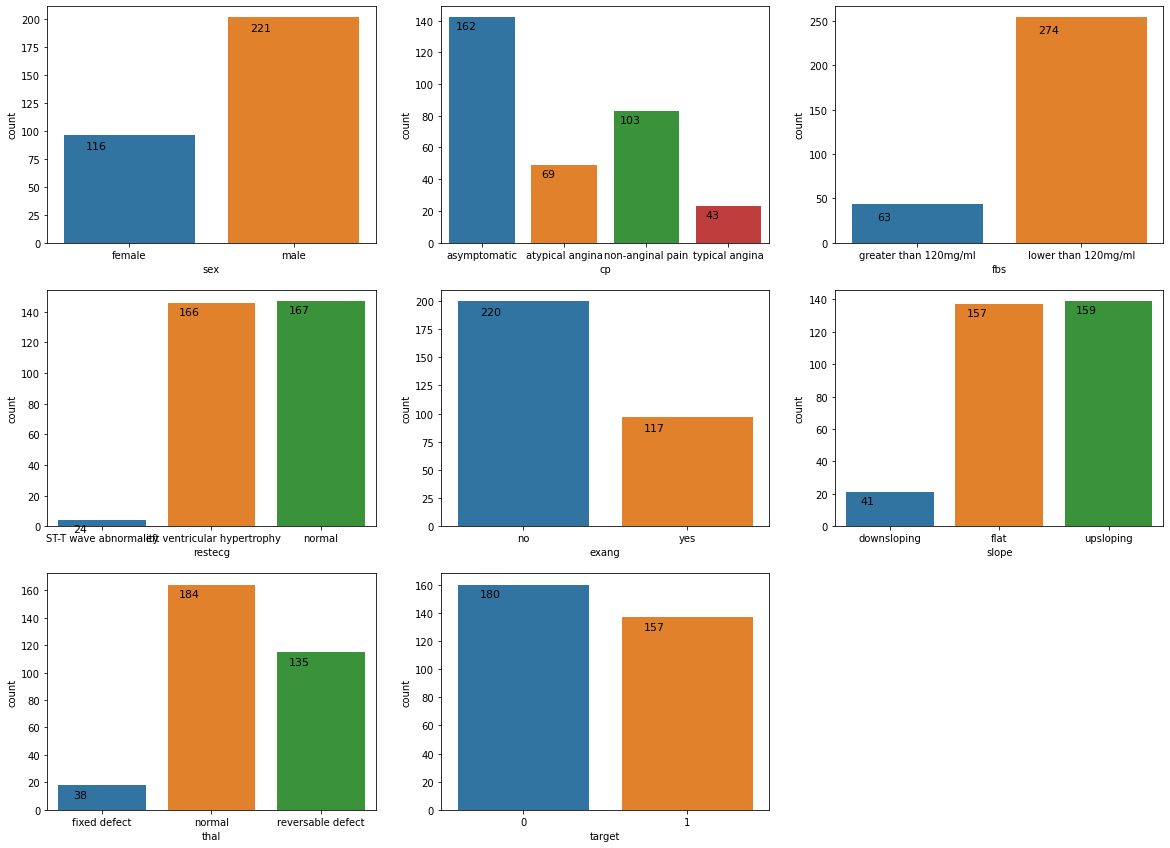

In [66]:
#Wykresy 
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    ax = sns.countplot(x=feature,data=df)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()+20}', 
                        (p.get_x()+0.2, p.get_height()+5),
                        ha='center', va='top', color='black', size=11)

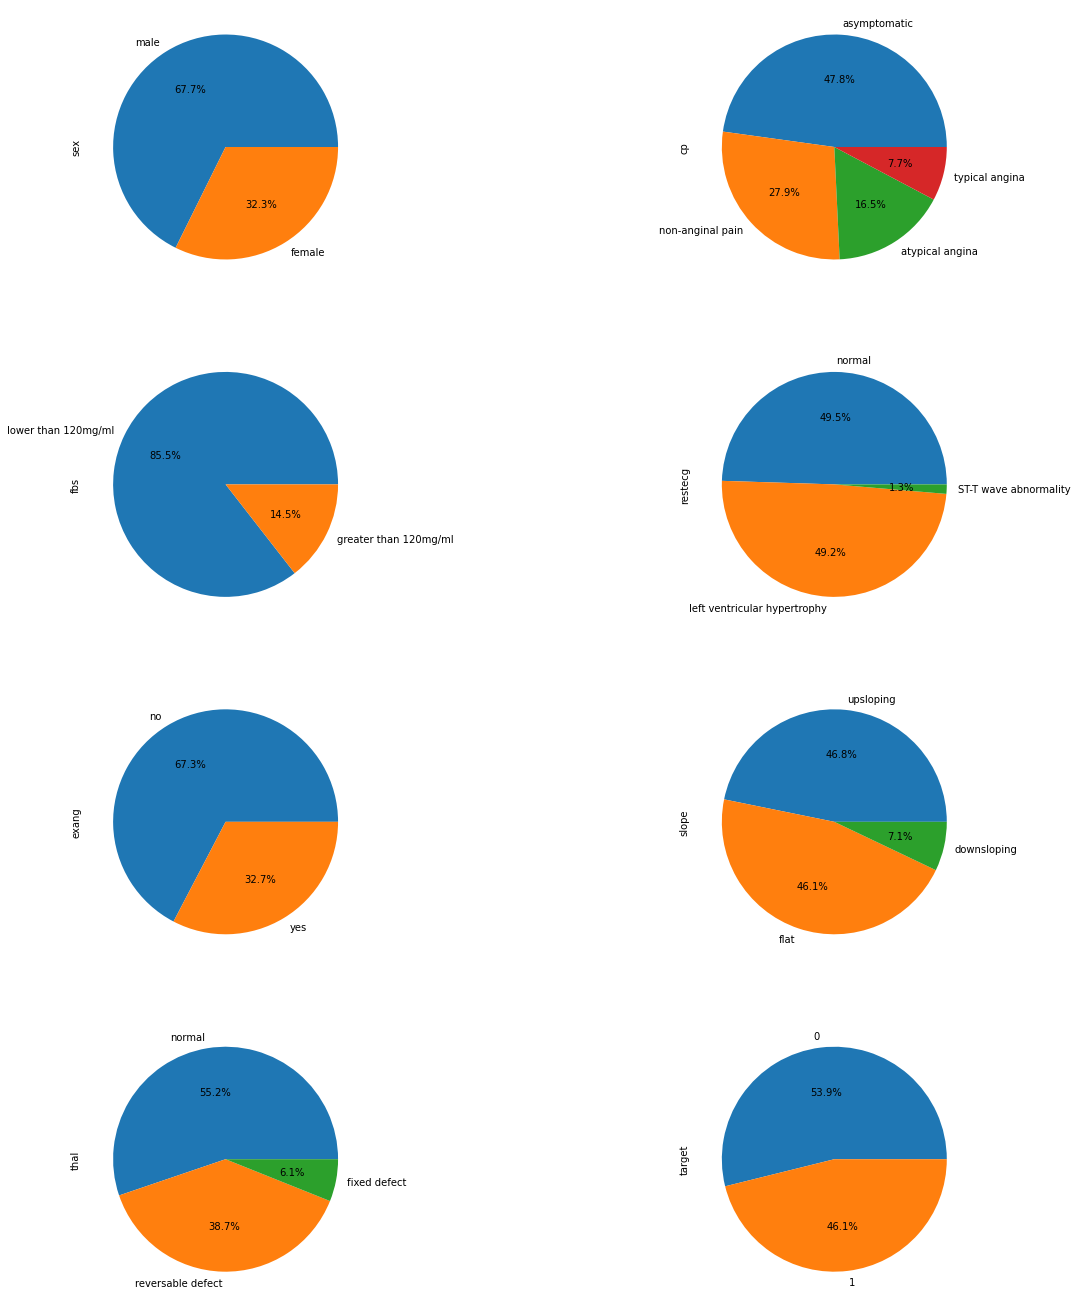

In [21]:
#Wykres kołowy służaący do reprezentacji stosunku
plt.figure(figsize=(20,30))
for i,feature in enumerate(cat_col):
    plt.subplot(5,2,i+1)
    df[feature].value_counts().plot(kind='pie', autopct="%.1f%%")

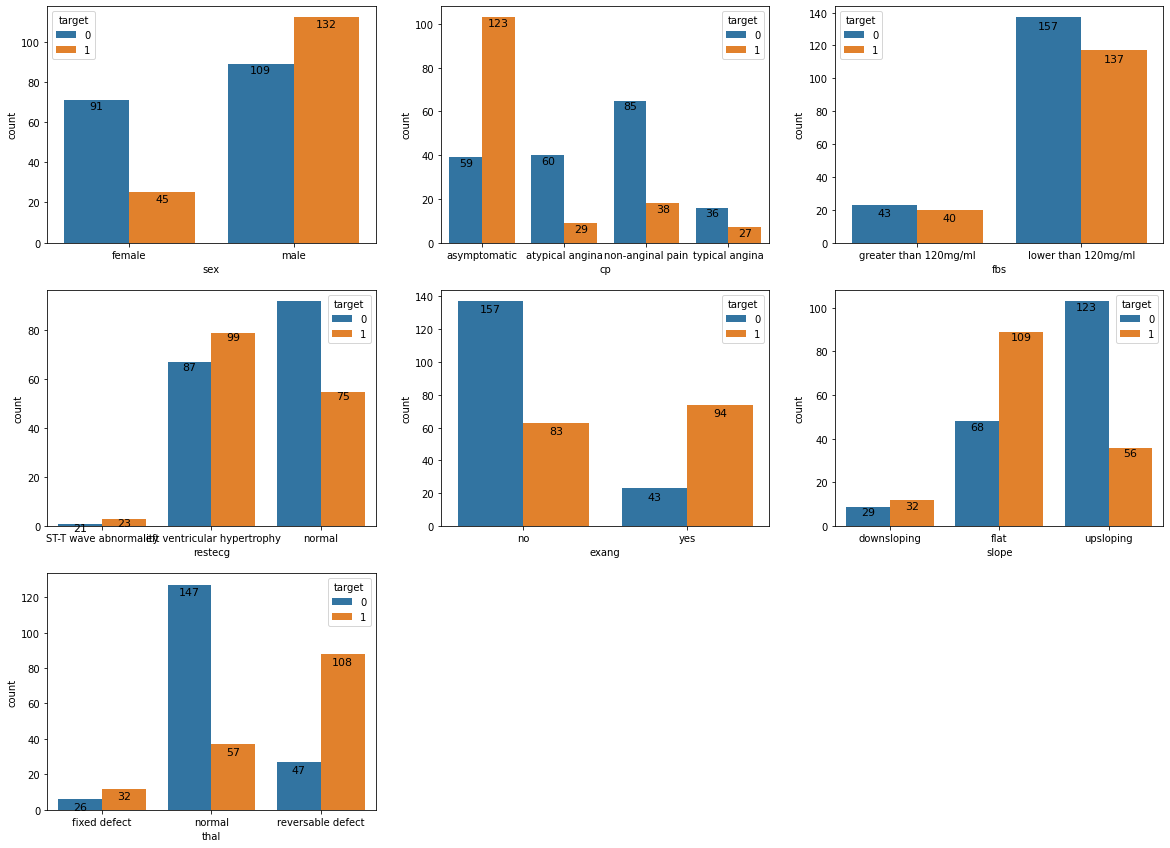

In [60]:
#Wykres reprezentujący wartości kolumn dyskretnych względem targetu
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_col):
    if feature != 'target':
        plt.subplot(4,3,i+1)
        ax = sns.countplot(x=feature,hue='target',data=df)
        for p in ax.patches:
            ax.annotate(f'\n{p.get_height()+20}', 
                        (p.get_x()+0.2, p.get_height()+5),
                        ha='center', va='top', color='black', size=11)

## Opis danych ciągłych

In [23]:
#Opis danych
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2
ca,297.0,0.676768,0.938965,0.0,0.0,0.0,1.0,3.0


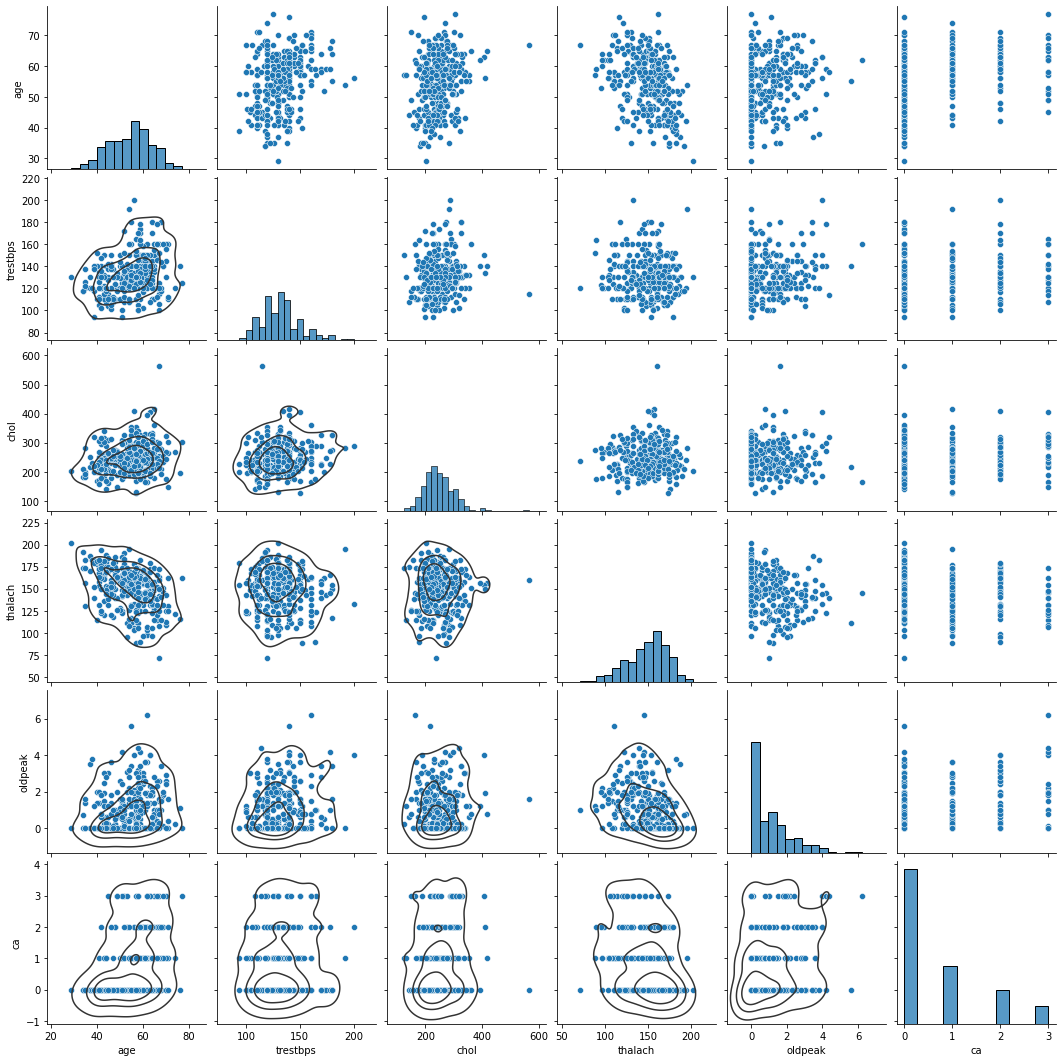

In [24]:
#Wykres reprezentujący rozkład danych ciągłych
g = sns.pairplot(df, diag_kind="hist", height=2.5)
g.map_lower(sns.kdeplot, levels=4, color=".2")

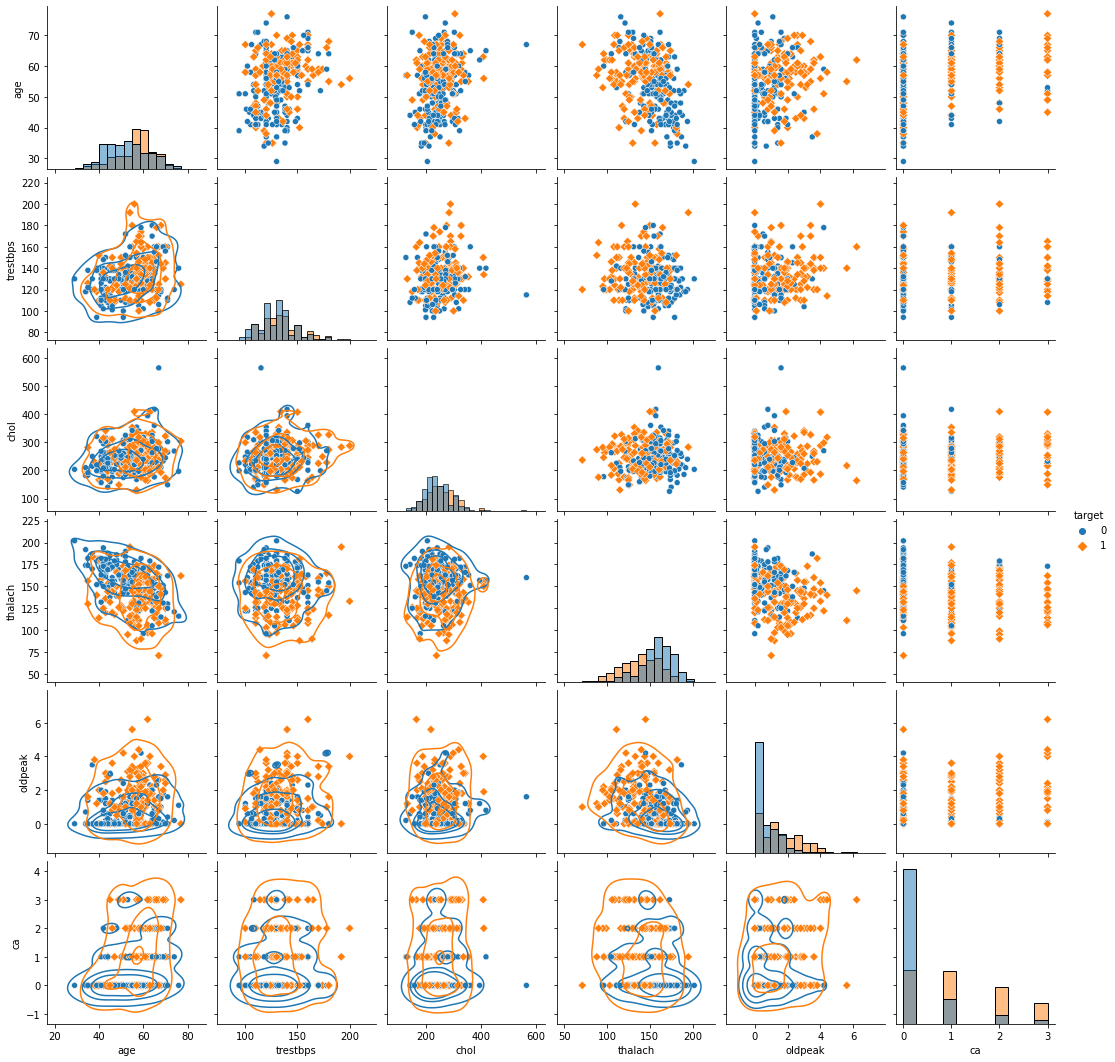

In [25]:
#Wykres reprezentujący rozkład danych ciągłych względem targetu
t = sns.pairplot(df, hue='target', diag_kind="hist", markers=["o", "D"], height=2.5)
t.map_lower(sns.kdeplot, levels=4, color=".2")

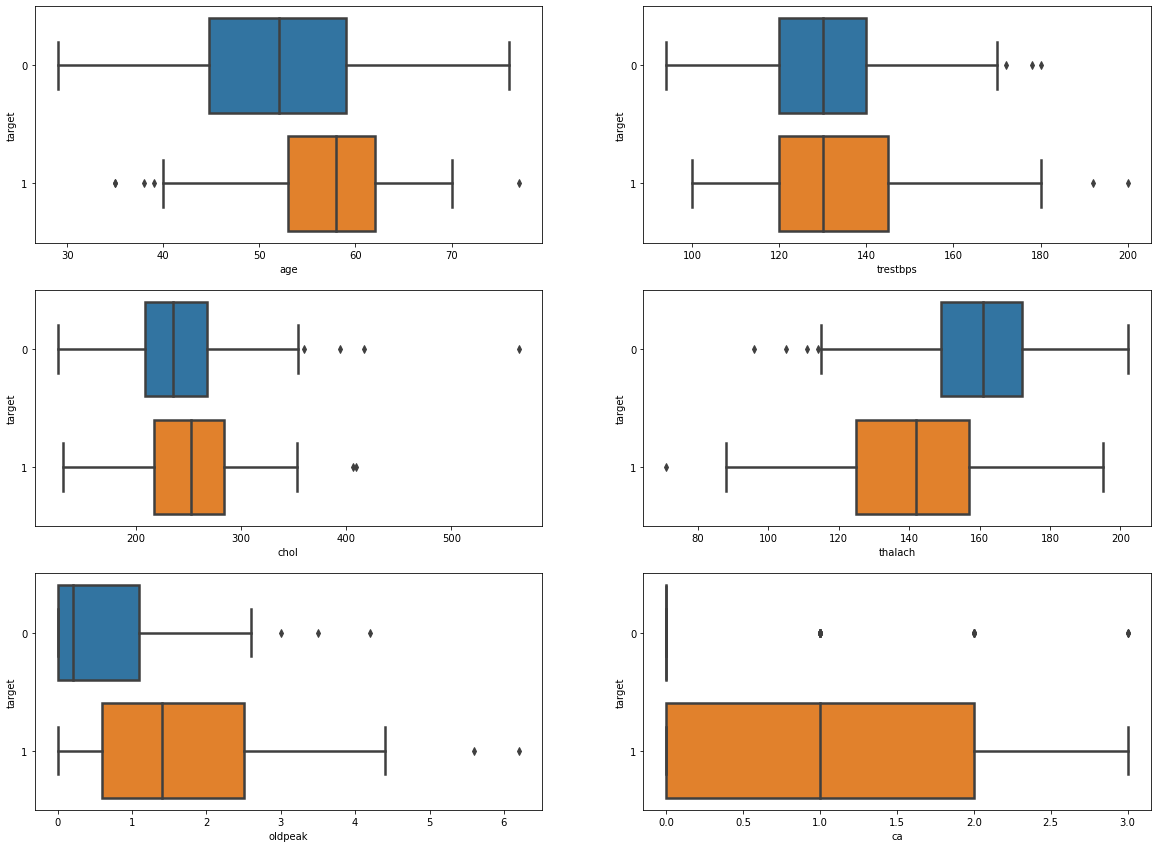

In [26]:
#Rozrzut danych względem targetu
plt.figure(figsize=(20,20))
for i,feature in enumerate(num_col):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=feature, y='target',  data=df, linewidth=2.5)

# Zapisanie danych 

In [27]:
#Zapisanie danych do pliku csv
dm.uploade_data(df,'hd_dataSet.csv')